In [1]:
import numpy as np
import matplotlib.pyplot as plt
from all_formulas import *
import pickle

In [2]:
def calc_ERF(b, a, T, q0, q1, m, n):
    
    num = np.exp(T*(b*(q1**m) - a)) - np.exp(T*(b*(q1**(m+n)) - a))
    den = np.exp(T*(b*(q0**m) - a)) - np.exp(T*(b*(q0**(m+n)) - a))
    
    return(num/den)

def calc_Y(b, a, T, q, m, n):
    
    num = np.exp(T*(b*(q**m) - a)) - np.exp(T*(b*(q**(m+n)) - a))

    return(num)

In [3]:
b_a_vals = [(7.61,3),(6.61,2),(5.61,1)]
T = 5
q0 = 1-1e-6
m = 20000
q1 = 1-3e-6

In [4]:
nvals_10000 = np.linspace(1,19900)
nvals_20000 = np.linspace(1,9900)

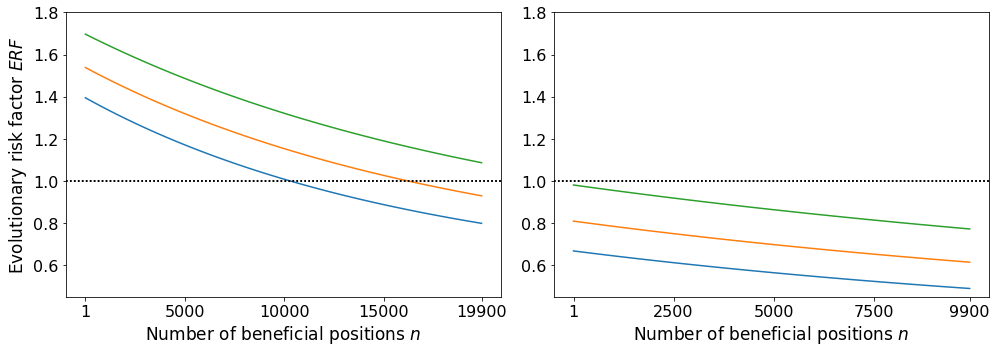

In [24]:
fig, ax = plt.subplots(1,2,figsize=(14,5))

for i in range(3):
    bval = b_a_vals[i][0]
    aval = b_a_vals[i][1]
    ax[0].plot(nvals_10000, calc_ERF(bval, aval, T, q0, q1, 10000, nvals_10000))
    ax[0].tick_params(labelsize = 16)
    ax[0].set_ylabel('Evolutionary risk factor $ERF$', fontsize = 17)
    ax[0].set_xlabel('Number of beneficial positions $n$', fontsize = 17)
    ax[0].set_xticks([1,5000,10000,15000,19900])

    ax[0].set_ylim(0.45,1.8)
    ax[0].axhline(1, c='k', linestyle ='dotted', label = '_nolegend_')
    
    ax[1].plot(nvals_20000, calc_ERF(bval, aval, T, q0, q1, 20000, nvals_20000))
    ax[1].tick_params(labelsize = 16)
    ax[1].set_xlabel('Number of beneficial positions $n$', fontsize = 17)
    ax[1].set_xticks([1,2500,5000,7500,9900])
    ax[1].set_ylim(0.45,1.8)
    ax[1].axhline(1, c='k', linestyle ='dotted', label = '_nolegend_')

#ax[1].legend(['b='+str(b_a_vals[i][0])+', a='+str(b_a_vals[i][1]) for i in range(3)], fontsize = 16)

plt.tight_layout()
plt.savefig('upmodl_nstudy_FEB6.jpg')

In [24]:
u1_range = np.logspace(-6,-3,10000)
mvals = [10000,20000]

In [32]:
test_m10000 = totalY_wholeinfection(T, 7.61, 3, 8, 1-u1_range, 1-u1_range,  mvals[0], 1)

In [35]:
a1_vals = [7.69,7.92,8.76]

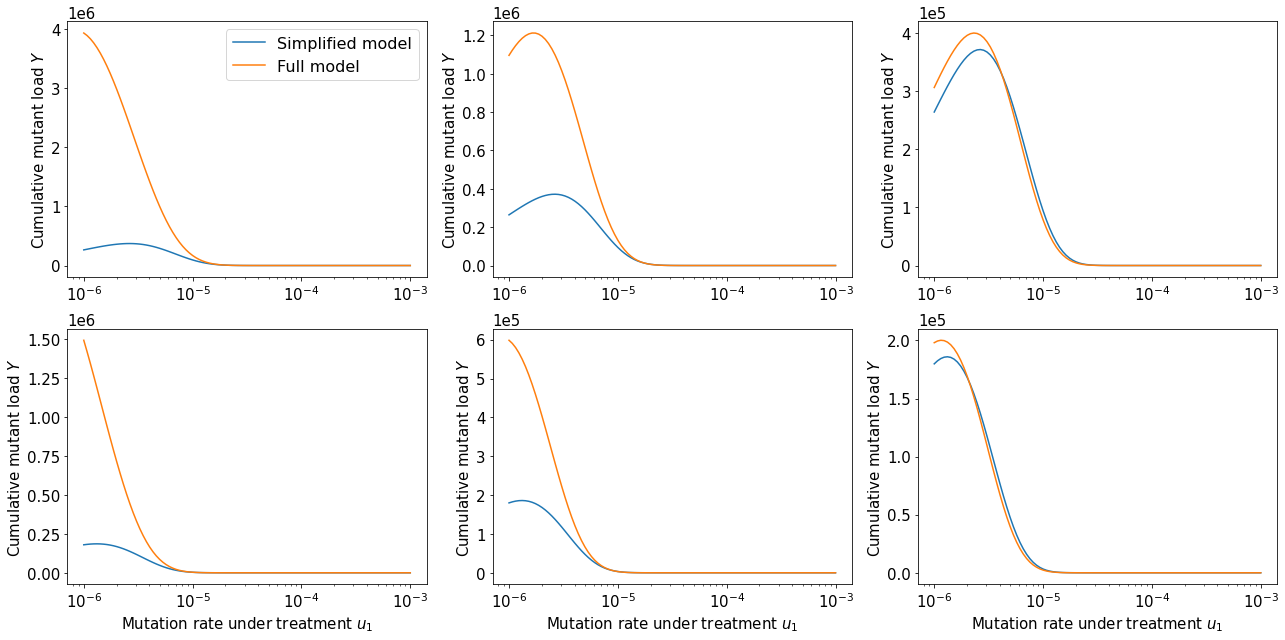

In [56]:
fig, ax = plt.subplots(2,3,figsize = (18,9))

for i in range(2):
    for j in range(3):
        ax[i,j].plot(u1_range, calc_Y(7.61, 3, T, 1-u1_range, mvals[i], 1))
        ax[i,j].plot(u1_range, totalY_wholeinfection(T, 7.61, 3, a1_vals[j], 1-u1_range, 1-u1_range,  mvals[i], 1))
        ax[i,j].set_xscale('log')
        ax[i,j].tick_params(labelsize = 15)
        ax[i,j].yaxis.offsetText.set_fontsize(15)
        ax[1,j].set_xlabel('Mutation rate under treatment $u_1$', fontsize = 15)
        ax[i,j].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
        ax[i,j].set_ylabel('Cumulative mutant load $Y$', fontsize = 15)
    ax[0,0].legend(['Simplified model', 'Full model'], fontsize = 16)

plt.tight_layout()
plt.savefig('comparison_up_fullmodel.jpg', dpi = 400, bbox_inches = 'tight')

In [66]:
np.log(2)/(7.61*5*1*1e-6)

18216.74587542563

In [4]:
a1_vals = [10]

In [6]:
b = 7.61
T = 5
u0 = 1e-6

s_values = np.linspace(1,10,100)
m_values =  list(np.linspace(10000,25000,800))

In [7]:
def calc_condition_growthmodel(m, b, T, u0):
    
    s_values = np.linspace(1,6,1000000)
    
    condition = np.log(s_values)/(b*T*u0*(s_values-1))-m
    critical_s = s_values[np.searchsorted(-condition,0)]
    
    return(critical_s)

In [8]:
with open('ratio_u_a110_FEB5.txt', 'rb') as f:
    ratio_simulation = pickle.load(f)
    
with open('ratio_u_a19_FEB5.txt', 'rb') as f:
    ratio_simulation_a19 = pickle.load(f)

In [9]:
minimal_safe_increase_growth = []

for mval in m_values:
    minimal_safe_increase_growth.append(calc_condition_growthmodel(mval, b, T, u0))

<ipython-input-7-eecee4a117ea>:5: RuntimeWarning: invalid value encountered in true_divide
  condition = np.log(s_values)/(b*T*u0*(s_values-1))-m


In [23]:
np.argmax(whole_infection_Y_a9)

3

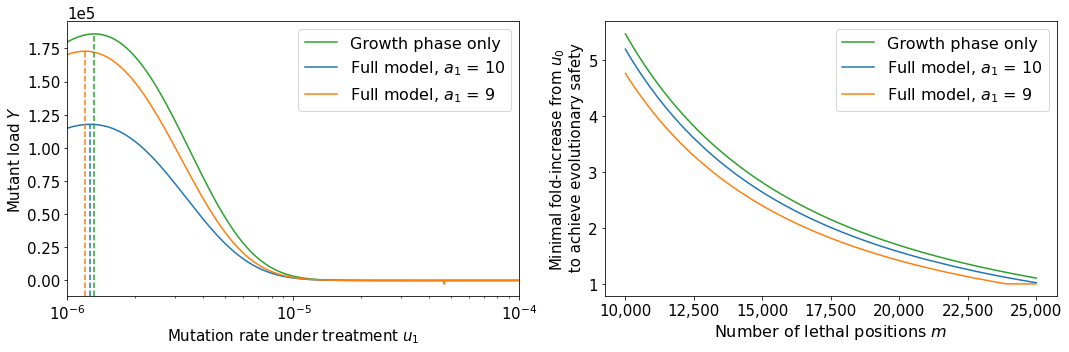

In [26]:
fig, ax = plt.subplots(1,2,figsize = (15,5))

growth_Y = calc_Y(7.61, 3, T, 1-u1_range, 20000, 1)
whole_infection_Y_a10 = totalY_wholeinfection(T, 7.61, 3, 10, 1-u1_range, 1-u1_range, 20000, 1)
whole_infection_Y_a9 = totalY_wholeinfection(T, 7.61, 3, 9, 1-u1_range, 1-u1_range, 20000, 1)

ax[0].plot(u1_range, growth_Y, c='C2')
ax[0].plot(u1_range, whole_infection_Y_a10, c='C0')
ax[0].plot(u1_range, whole_infection_Y_a9, c='C1')

## add vertical lines going from maximum of curve
ylim_coor = ax[0].get_ylim()
ax[0].axvline(u1_range[np.argmax(growth_Y)],  ymax = (np.max(growth_Y)-ylim_coor[0])/(ylim_coor[1]-ylim_coor[0]), c='C2', linestyle = 'dashed')
ax[0].axvline(u1_range[np.argmax(whole_infection_Y_a9)],  ymax = (np.max(whole_infection_Y_a9)-ylim_coor[0])/(ylim_coor[1]-ylim_coor[0]), c='C1', linestyle = 'dashed')
ax[0].axvline(u1_range[np.argmax(whole_infection_Y_a10)],  ymax = (np.max(whole_infection_Y_a10)-ylim_coor[0])/(ylim_coor[1]-ylim_coor[0]), c='C0', linestyle = 'dashed')




ax[0].set_xscale('log')
ax[0].tick_params(labelsize = 15)
ax[0].yaxis.offsetText.set_fontsize(15)
ax[0].set_xlabel('Mutation rate under treatment $u_1$', fontsize = 15)
ax[0].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax[0].set_ylabel('Mutant load $Y$', fontsize = 15)
ax[0].legend(['Growth phase only',
            'Full model, $a_1$ = 10',
           'Full model, $a_1$ = 9'], fontsize = 16)
ax[0].set_xlim(1e-6,1e-4)

ax[1].plot(m_values, minimal_safe_increase_growth, c='C2')
ax[1].plot(m_values, ratio_simulation[::-1], c='C0')
ax[1].plot(m_values, ratio_simulation_a19[::-1], c='C1')


ax[1].set_ylabel('Minimal fold-increase from $u_0$\n to achieve evolutionary safety', fontsize = 15)
ax[1].set_xticks([10000,12500,15000,17500,20000,22500,25000])
ax[1].set_xticklabels(['10,000','12,500','15,000','17,500','20,000','22,500','25,000'])
ax[1].legend(['Growth phase only',
            'Full model, $a_1$ = 10',
           'Full model, $a_1$ = 9'], fontsize = 16)
ax[1].set_xlabel('Number of lethal positions $m$', fontsize = 16)
ax[1].tick_params(labelsize = 15)

plt.tight_layout()
plt.savefig('comparison_up_fullmodel_FEB12.jpg', dpi = 400, bbox_inches = 'tight')

Text(0.5, 0, 'Number of lethal positions $m$')

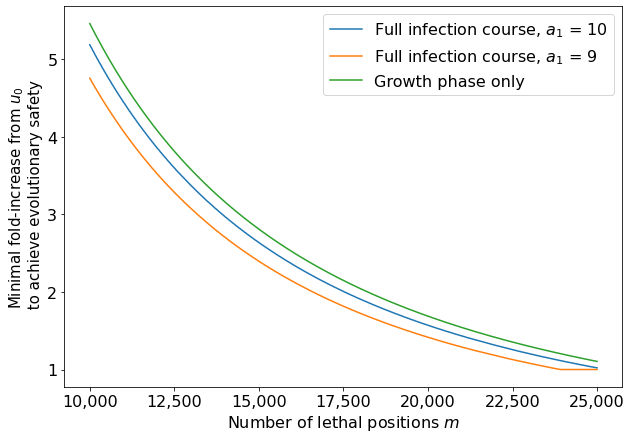

In [31]:
fig, ax = plt.subplots(figsize = (10,7))


ax.tick_params(labelsize= 16)
ax.set_ylabel('Minimal fold-increase from $u_0$\n to achieve evolutionary safety', fontsize = 15)
ax.set_xticks([10000,12500,15000,17500,20000,22500,25000])
ax.set_xticklabels(['10,000','12,500','15,000','17,500','20,000','22,500','25,000'])
ax.legend(['Full infection course, $a_1$ = 10',
           'Full infection course, $a_1$ = 9',
           'Growth phase only'], fontsize = 16)
ax.set_xlabel('Number of lethal positions $m$', fontsize = 16)